# Avocado Project
## Project Description
## This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.  Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

### The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

# Inspiration /Label 
## The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


##  Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

#  EDA

In [2]:
df = pd.read_csv('/Users/sneha/Downloads/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
df = df.drop(columns='Unnamed: 0')

## Check for null values

In [9]:
df.isnull().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [10]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Check for Zero values

In [11]:
zero_counts = (df == 0).sum()

# Display the counts for each column
print(zero_counts)

Date                0
AveragePrice        0
Total Volume        0
4046              242
4225               61
4770             5497
Total Bags         15
Small Bags        159
Large Bags       2370
XLarge Bags     12048
type                0
year                0
region              0
dtype: int64


In [12]:
df[df.duplicated()]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [13]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [14]:
df = df.drop((df[df['Total Bags'] == 0]).index)

# Reset the index of the DataFrame after dropping rows
df.reset_index(drop=True, inplace=True)


In [15]:
df = df.drop((df[df['Small Bags'] == 0]).index)

# Reset the index of the DataFrame after dropping rows
df.reset_index(drop=True, inplace=True)


In [16]:
## float columns : 
# Filter float columns
float_columns = df.select_dtypes(include=['float64'])

# Print the float columns
print(float_columns.columns)

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')


## Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags' Represents the nunmber of Avacados Sold. So, they should not be a float value. 
### Convert them into an integer value

In [17]:
## Lets Check if Total Value is the sum of 4046, 4225,4770 

df['Sum_PLU'] = df['4046']+df['4225']+df['4770']

are_equal = df['Sum_PLU'] == df['Total Volume']
# Count the number of True values
count_true = are_equal.sum()
# Print the count
print(count_true)

## Lets Check if Total Value is the sum of 4046, 4225,4770 , Small Bags , Large Bags, XLarge Bags

df['Sum'] = df['4046']+df['4225']+df['4770']+ df['Small Bags'] + df['Large Bags'] + df['XLarge Bags']
are_equal = df['Sum'] == df['Total Volume']
# Count the number of True values
count_true = are_equal.sum()
# Print the count
print(count_true)

0
11442


In [18]:
df['GreenAvacado'] = abs(df['Total Volume']-df['Sum'])
df['GreenAvacado']

0        0.000000e+00
1        7.275958e-12
2        0.000000e+00
3        0.000000e+00
4        7.275958e-12
             ...     
18085    3.637979e-12
18086    0.000000e+00
18087    1.818989e-12
18088    1.818989e-12
18089    3.637979e-12
Name: GreenAvacado, Length: 18090, dtype: float64

In [19]:
df = df.drop(columns=['Sum','Sum_PLU'])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,GreenAvacado
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0.000000e+00
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,7.275958e-12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0.000000e+00
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0.000000e+00
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,7.275958e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18085,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,3.637979e-12
18086,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,0.000000e+00
18087,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1.818989e-12
18088,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1.818989e-12


In [20]:
## object columns : 
# Filter float columns
object_columns = df.select_dtypes(include=['object'])

# Print the float columns
print(object_columns.columns)

Index(['Date', 'type', 'region'], dtype='object')


In [21]:
df['region'].value_counts()

Albany                 338
MiamiFtLauderdale      338
Nashville              338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
Sacramento             338
SanDiego               338
SouthCarolina          338
SouthCentral           338
Southeast              338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
Midsouth               338
NewOrleansMobile       338
DallasFtWorth          338
GreatLakes             338
Chicago                338
BuffaloRochester       338
CincinnatiDayton       338
LosAngeles             338
Detroit                338
Boston                 338
California             338
GrandRapids            338
HarrisburgScranton     338
HartfordSpringfield    338
H

In [22]:
df['year'].value_counts()

2017    5720
2016    5580
2015    5494
2018    1296
Name: year, dtype: int64

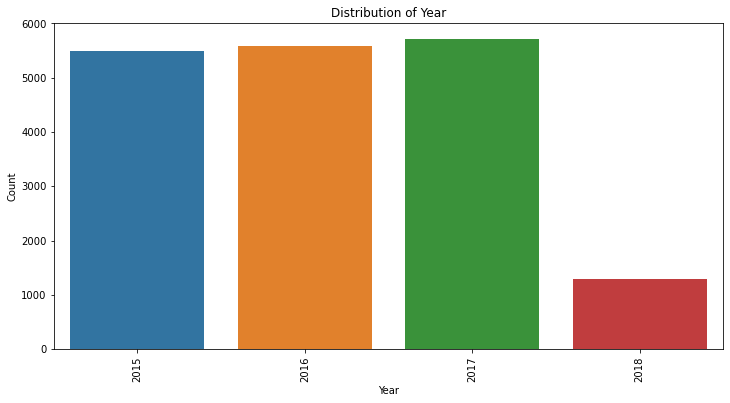

In [23]:
year_counts = df['year'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Year')
plt.show()

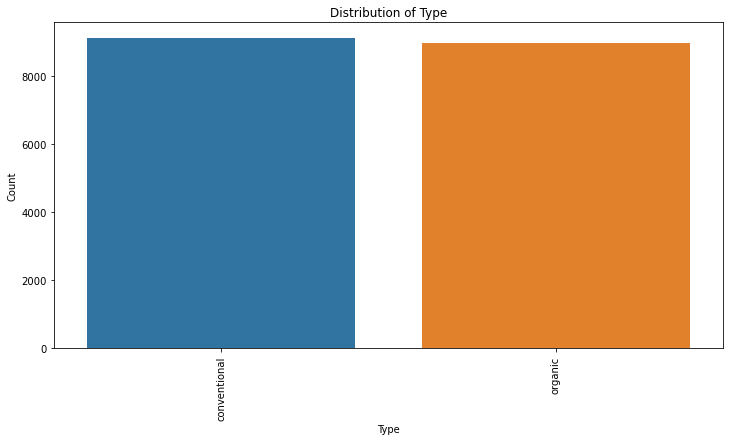

In [26]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Type')
plt.show()

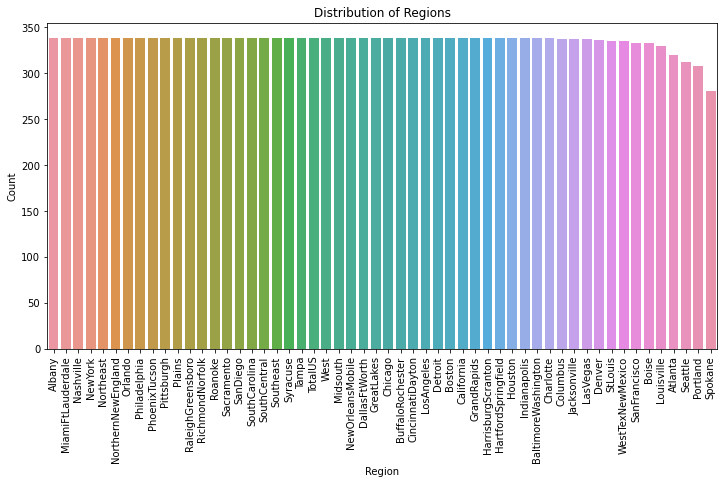

In [27]:
# Distribution of Regions
region_counts = df['region'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Regions')
plt.show()

## It is clear the distribution of the dataset is very equivalent across all categories. So, it doesnt not really makes them an outstanding factor to understand the dataset. 

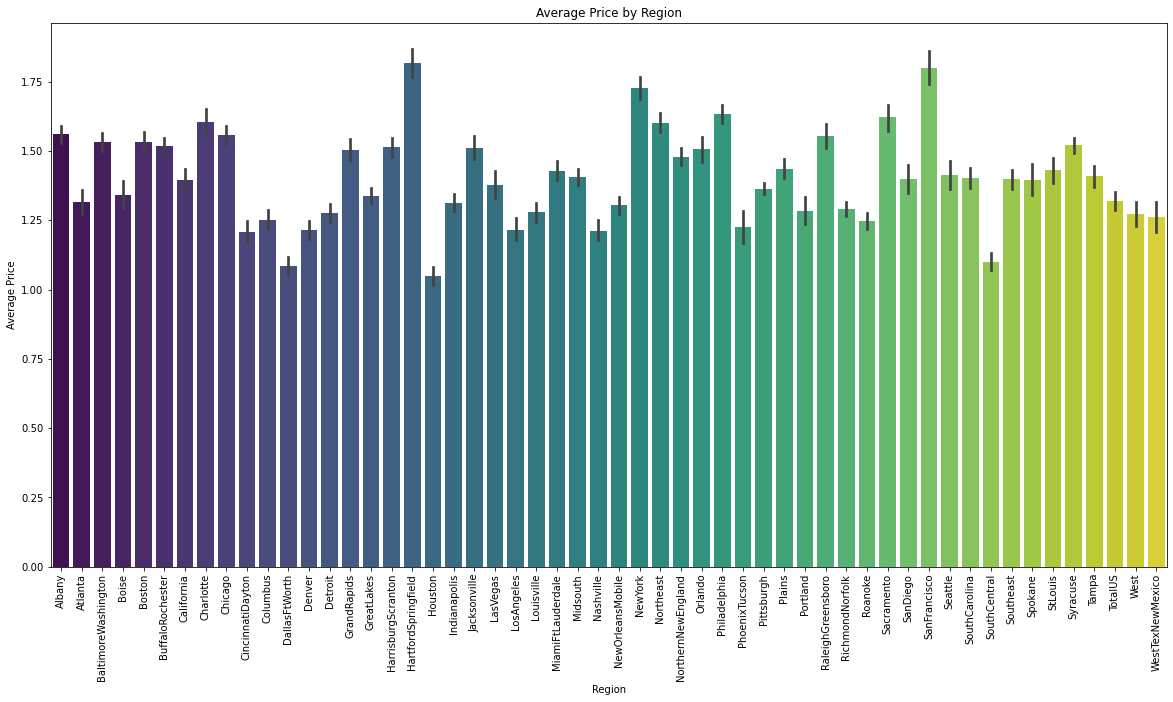

In [28]:
plt.figure(figsize=(20, 10))
sns.barplot(x='region', y='AveragePrice', data=df, palette='viridis')
plt.title('Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

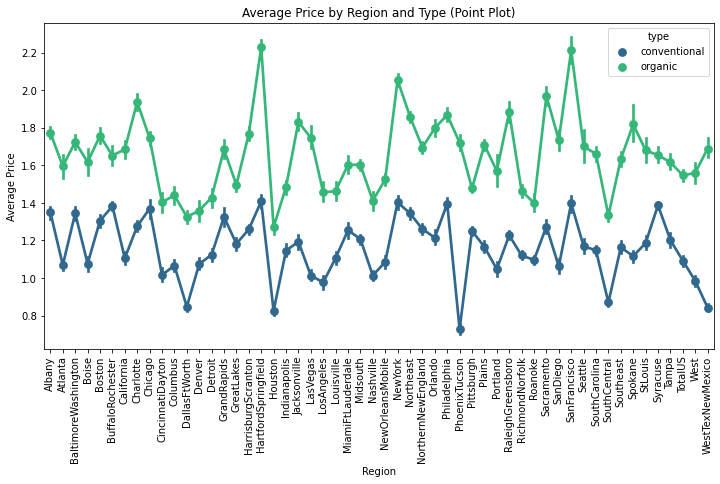

In [29]:
# Create a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='region', y='AveragePrice', hue='type', data=df, palette='viridis')
plt.title('Average Price by Region and Type (Point Plot)')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

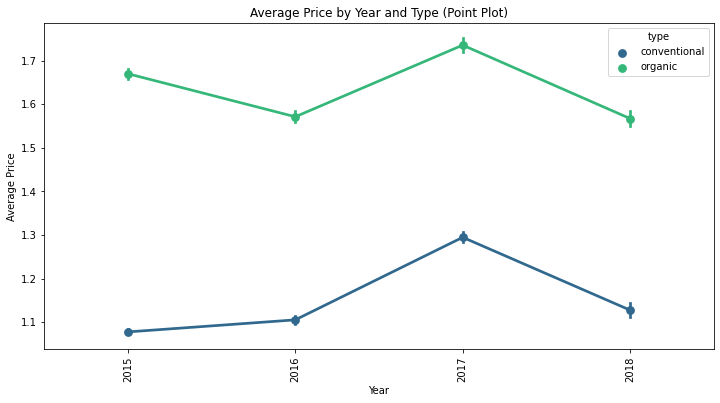

In [30]:
# Create a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='year', y='AveragePrice', hue='type', data=df, palette='viridis')
plt.title('Average Price by Year and Type (Point Plot)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

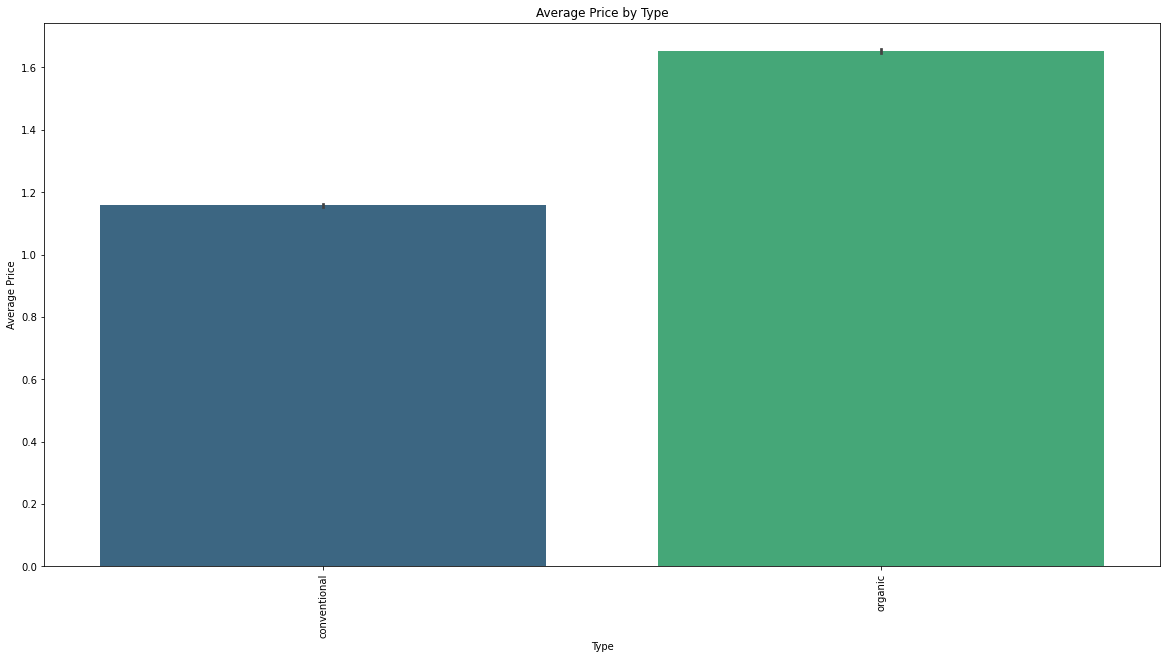

In [31]:
plt.figure(figsize=(20, 10))
sns.barplot(x='type', y='AveragePrice', data=df, palette='viridis')
plt.title('Average Price by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

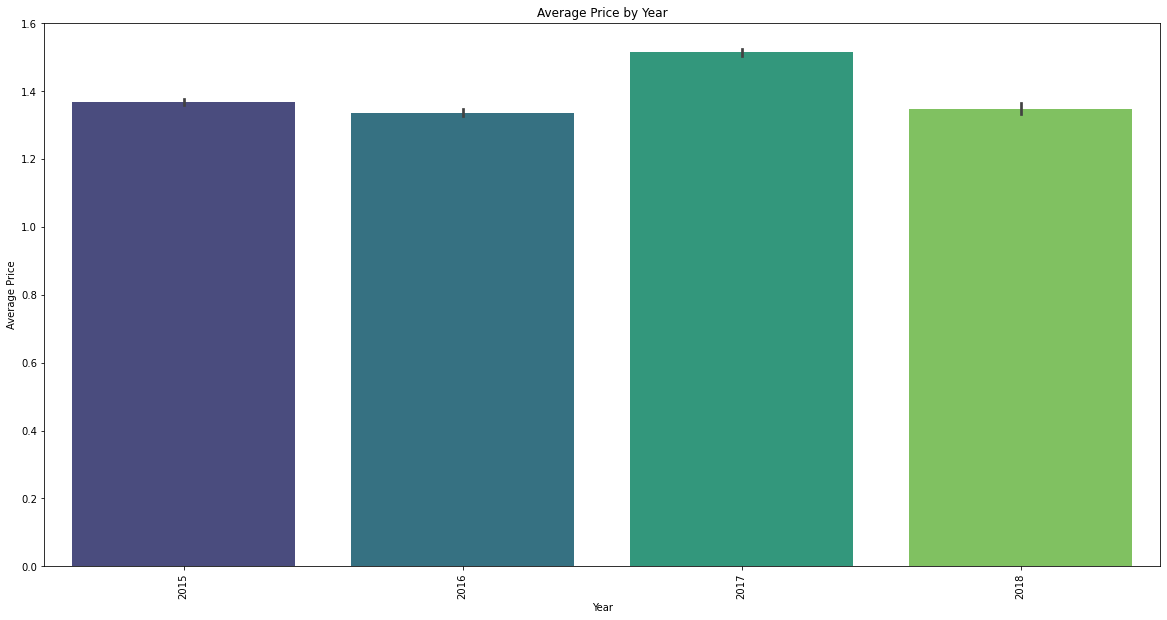

In [32]:
plt.figure(figsize=(20, 10))
sns.barplot(x='year', y='AveragePrice', data=df, palette='viridis')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

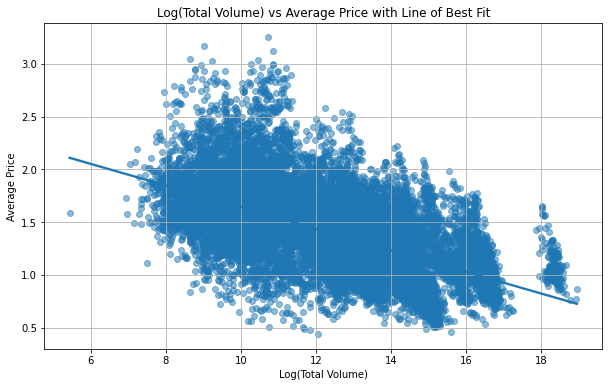

In [33]:

df['Log_Total_Volume'] = np.log(df['Total Volume'])+1

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Log_Total_Volume', y='AveragePrice', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Log(Total Volume)')
plt.ylabel('Average Price')
plt.title('Log(Total Volume) vs Average Price with Line of Best Fit')
plt.grid(True)
plt.show()

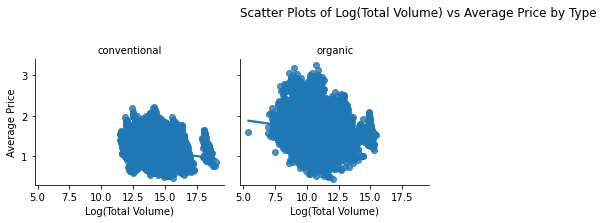

In [34]:
# Create a separate scatter plot for each region
g = sns.FacetGrid(df, col='type', col_wrap=4, height=3)
g.map(sns.regplot, 'Log_Total_Volume', 'AveragePrice')
g.set_axis_labels('Log(Total Volume)', 'Average Price')
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Scatter Plots of Log(Total Volume) vs Average Price by Type', y=1.02)
plt.tight_layout()
plt.show()

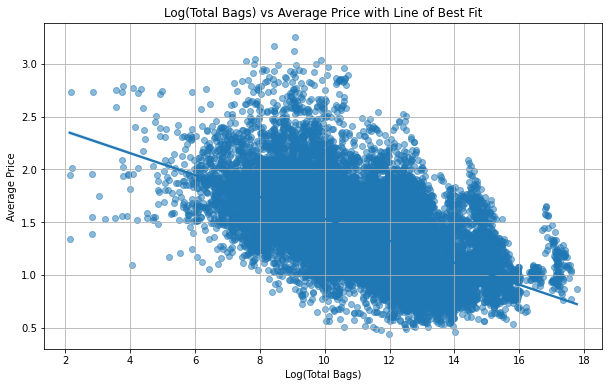

In [35]:
df['Log_Total_Bags'] = np.log(df['Total Bags'])+1

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Log_Total_Bags', y='AveragePrice', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Log(Total Bags)')
plt.ylabel('Average Price')
plt.title('Log(Total Bags) vs Average Price with Line of Best Fit')
plt.grid(True)
plt.show()

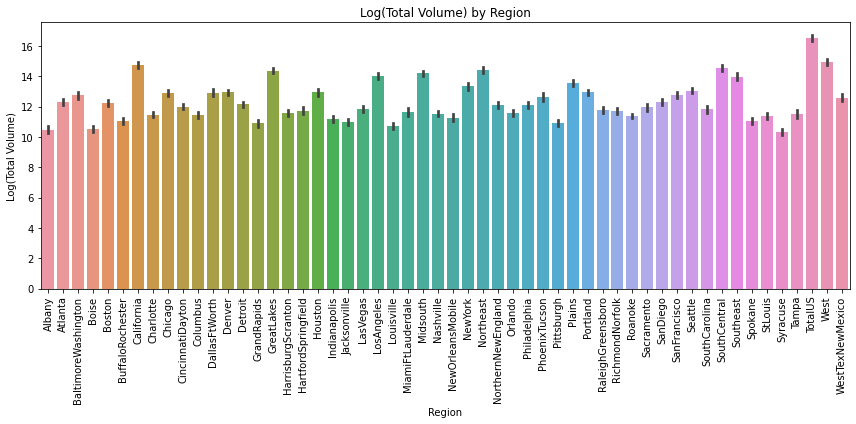

In [36]:
# Create a bar plot of log-transformed 'Total Volume' by region
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='region', y='Log_Total_Volume')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Log(Total Volume)')
plt.title('Log(Total Volume) by Region')
plt.tight_layout()
plt.show()

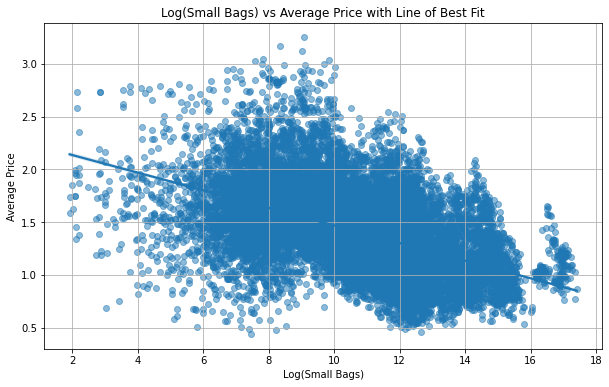

In [37]:
df['Log_Small_Bags'] = np.log(df['Small Bags'])+1

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Log_Small_Bags', y='AveragePrice', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Log(Small Bags)')
plt.ylabel('Average Price')
plt.title('Log(Small Bags) vs Average Price with Line of Best Fit')
plt.grid(True)
plt.show()

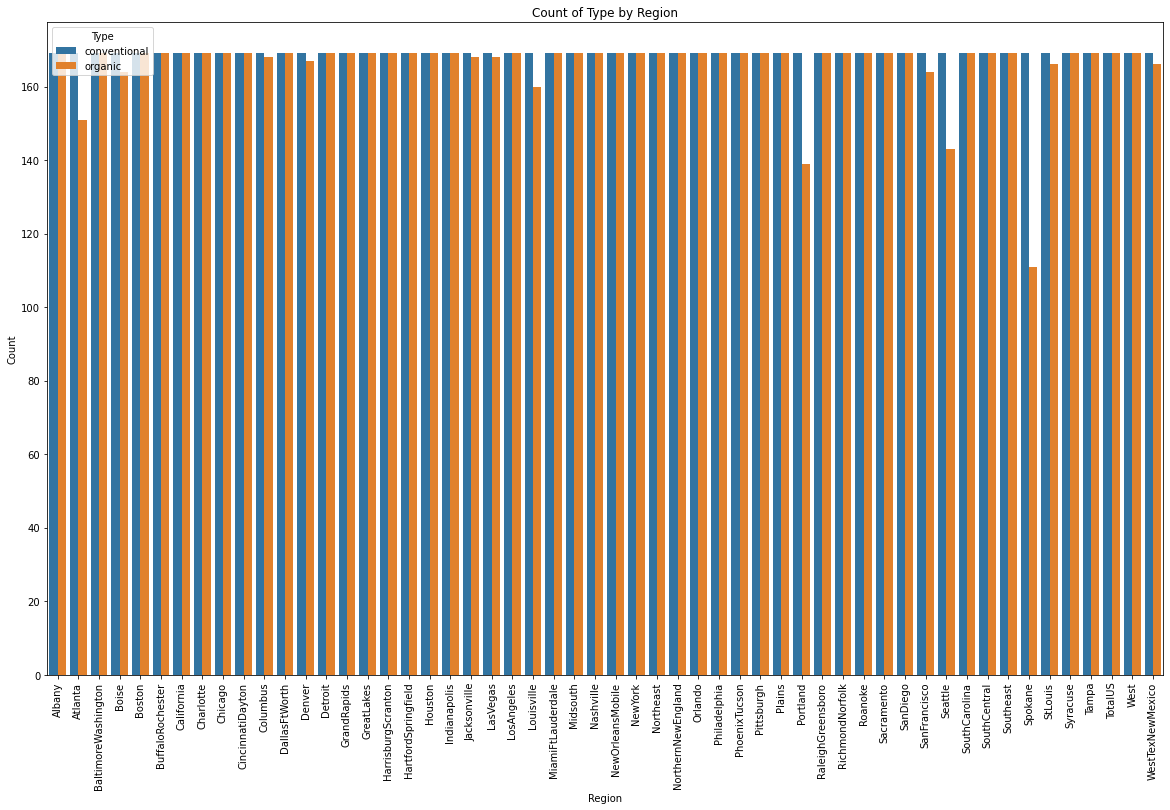

In [38]:

# Create a count plot
plt.figure(figsize=(20, 12))
sns.countplot(x='region', hue='type', data=df)
plt.xticks(rotation=90)
plt.title('Count of Type by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

## Convert Date from object to datetime and extract Month

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

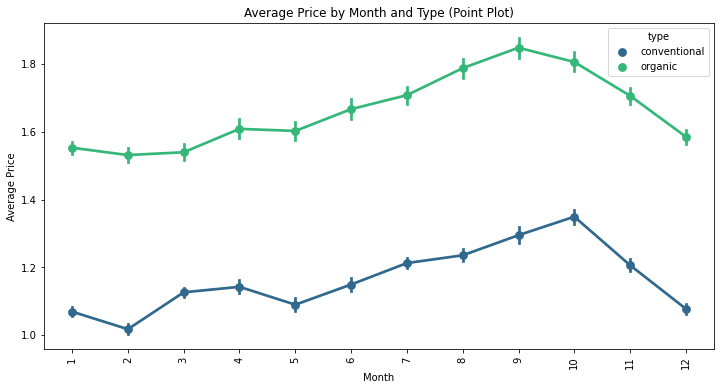

In [40]:
# Create a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='Month', y='AveragePrice', hue='type', data=df, palette='viridis')
plt.title('Average Price by Month and Type (Point Plot)')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

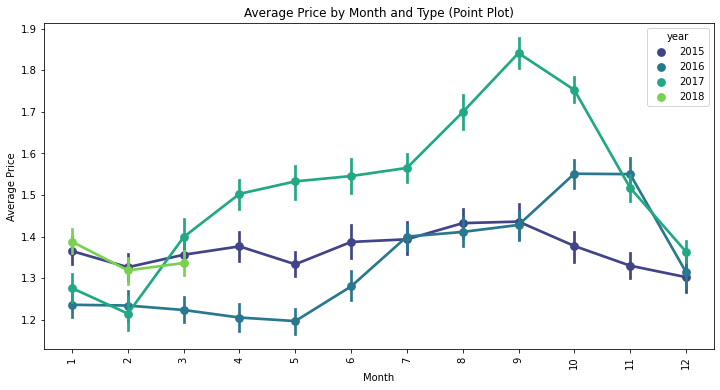

In [41]:
# Create a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='Month', y='AveragePrice', hue='year', data=df, palette='viridis')
plt.title('Average Price by Month and Type (Point Plot)')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Label Encoding the object dataset. 

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['year'] = le.fit_transform(df['year'])
df['type'] = le.fit_transform(df['type'])
df['Month'] = le.fit_transform(df['Month'])
df['region'] =le.fit_transform(df['region'])

In [43]:
df = df.drop(columns='Date')

## Check and Handle Outliers 

In [44]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)

# Fit the model and predict outliers
outliers = isolation_forest.fit_predict(df)

outlier_indices = [i for i, pred in enumerate(outliers) if pred == -1]

df.iloc[outlier_indices]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,GreenAvacado,Log_Total_Volume,Log_Total_Bags,Log_Small_Bags,Month
312,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,0,0,6,0.000000e+00,16.432989,15.008366,14.901817,11
313,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,0,0,6,9.313226e-10,16.362166,15.005441,14.875385,11
314,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,0,0,6,0.000000e+00,16.475519,15.280777,15.154844,11
315,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,0,0,6,0.000000e+00,16.569142,15.227797,15.135157,11
316,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,0,0,6,0.000000e+00,16.336273,14.893857,14.807044,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18061,1.53,1384683.41,117922.52,287724.61,1703.52,977084.84,774695.74,201878.69,510.41,1,3,51,2.479200e+02,15.140982,14.792329,14.560226,1
18062,1.61,1336979.09,118616.17,280080.34,1270.61,936859.49,796104.27,140652.84,102.38,1,3,51,1.524800e+02,15.105923,14.750289,14.587485,0
18063,1.63,1283987.65,108705.28,259172.13,1490.02,914409.26,710654.40,203526.59,228.27,1,3,51,2.109600e+02,15.065481,14.726034,14.473942,0
18064,1.59,1476651.08,145680.62,323669.83,1580.01,1005593.78,858772.69,146808.97,12.12,1,3,51,1.268400e+02,15.205287,14.821089,14.663260,0


In [45]:
# Get indices of non-outliers
non_outlier_indices = [i for i, pred in enumerate(outliers) if pred == 1]

# Filter the DataFrame to keep only non-outliers
df = df.iloc[non_outlier_indices]

## Check for MUlticolinearity 

In [46]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,GreenAvacado,Log_Total_Volume,Log_Total_Bags,Log_Small_Bags,Month
AveragePrice,1.000000,-0.327388,-0.330282,-0.212430,-0.226002,-0.297585,-0.265293,-0.271067,-0.140643,0.601353,0.105524,0.011167,0.012441,-0.571773,-0.564321,-0.481398,0.156422
Total Volume,-0.327388,1.000000,0.800031,0.850608,0.532231,0.916073,0.905045,0.584832,0.426147,-0.454598,-0.018567,0.077986,-0.009925,0.657393,0.608824,0.587709,-0.013291
4046,-0.330282,0.800031,1.000000,0.396797,0.341075,0.662264,0.617970,0.523330,0.341330,-0.362364,-0.041207,0.127627,-0.012357,0.513540,0.458718,0.438363,-0.009484
4225,-0.212430,0.850608,0.396797,1.000000,0.502921,0.750386,0.784962,0.359707,0.289049,-0.380298,-0.047910,0.009652,-0.009248,0.547952,0.493513,0.486538,-0.016864
4770,-0.226002,0.532231,0.341075,0.502921,1.000000,0.440286,0.462541,0.189666,0.404315,-0.325826,-0.098650,-0.089970,-0.011185,0.411146,0.355411,0.355233,-0.030720
Total Bags,-0.297585,0.916073,0.662264,0.750386,0.440286,1.000000,0.968031,0.693333,0.487023,-0.417979,0.087322,0.082464,-0.000467,0.631470,0.636674,0.603129,-0.001715
Small Bags,-0.265293,0.905045,0.617970,0.784962,0.462541,0.968031,1.000000,0.491008,0.503182,-0.402246,0.065464,0.069054,-0.000623,0.603996,0.603351,0.597961,-0.001237
Large Bags,-0.271067,0.584832,0.523330,0.359707,0.189666,0.693333,0.491008,1.000000,0.196467,-0.292425,0.111889,0.092023,0.000735,0.457748,0.478150,0.377834,-0.003630
XLarge Bags,-0.140643,0.426147,0.341330,0.289049,0.404315,0.487023,0.503182,0.196467,1.000000,-0.264132,0.081174,-0.024575,-0.008778,0.317752,0.309693,0.299712,0.017619
type,0.601353,-0.454598,-0.362364,-0.380298,-0.325826,-0.417979,-0.402246,-0.292425,-0.264132,1.000000,0.015161,0.016313,0.033143,-0.806599,-0.727709,-0.722913,-0.007162


Text(0.5, 1.0, 'Correlation Heatmap')

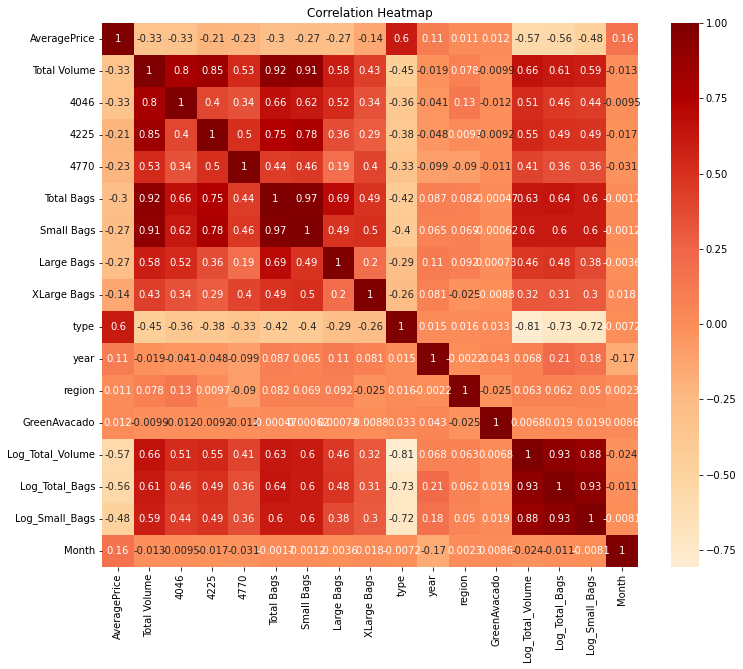

In [47]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='OrRd', center=0)

# Add title
plt.title('Correlation Heatmap')


## Well I dont think there is any conclusive realtion between Total Volume and rest of the float columns. 
## But since, they seem to be highly co related I can make a decision to drop Total Volume as it is increasing the redundancy. 

## Part 1  : y = region , building a classifier model 

## See for feature importance. 

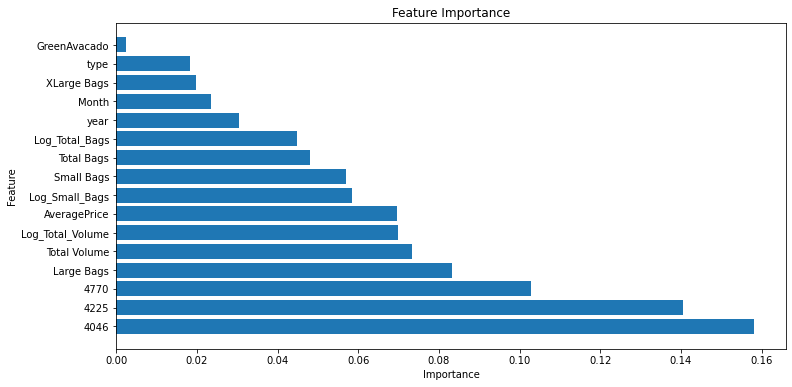

In [48]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to your data
X = df.drop(columns=['region'])  # Assuming 'region' is your target column
y = df['region']
clf.fit(X, y)

# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## Creating Multiple Models, to check accuracy. 

Model: DecisionTree



MODEL NAME :  DecisionTreeClassifier(criterion='entropy') 




              precision    recall  f1-score   support

           0       0.72      0.80      0.76       101
           1       0.59      0.58      0.58        92
           2       0.91      0.93      0.92       107
           3       0.82      0.79      0.80        90
           4       0.82      0.81      0.82        99
           5       0.68      0.66      0.67       110
           6       0.90      0.91      0.91        58
           7       0.88      0.85      0.87       110
           8       0.97      0.88      0.93       120
           9       0.86      0.79      0.82       114
          10       0.70      0.62      0.66       104
          11       0.81      0.86      0.83        92
          12       0.88      0.85      0.86        94
          13       0.72      0.78      0.75        98
          14       0.84      0.83      0.84        98
          15       0.88      0.87      0.87      

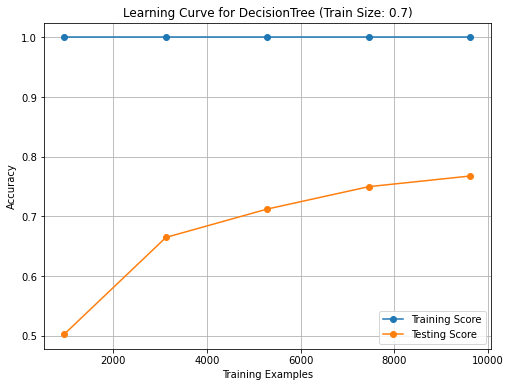

Cross-Validation Scores for DecisionTree: [0.45970323 0.6491126  0.57142857 0.53913296 0.36368926]
Mean CV Score for DecisionTree: 0.516613325574629





MODEL NAME :  DecisionTreeClassifier(criterion='entropy') 




              precision    recall  f1-score   support

           0       0.81      0.85      0.83        74
           1       0.66      0.76      0.70        58
           2       0.92      0.85      0.88        67
           3       0.80      0.89      0.84        57
           4       0.83      0.85      0.84        61
           5       0.74      0.74      0.74        74
           6       0.83      0.97      0.90        36
           7       0.77      0.82      0.79        66
           8       0.93      0.91      0.92        74
           9       0.83      0.82      0.83        73
          10       0.59      0.63      0.61        76
          11       0.84      0.89      0.87        65
          12       0.77      0.81      0.79        59
          13       0.77   

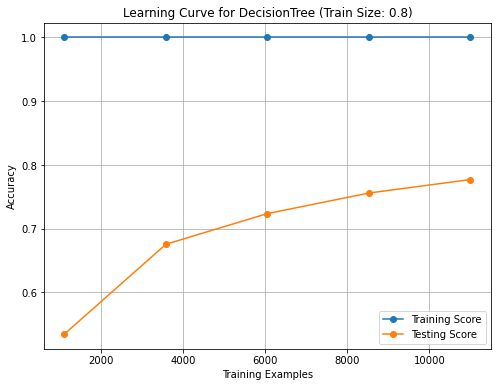

Cross-Validation Scores for DecisionTree: [0.4538842  0.64998545 0.57113762 0.52662205 0.37096305]
Mean CV Score for DecisionTree: 0.5145184754146058


Model: RandomForest



MODEL NAME :  RandomForestClassifier(random_state=42) 




              precision    recall  f1-score   support

           0       0.87      0.93      0.90       101
           1       0.80      0.82      0.81        92
           2       0.96      0.98      0.97       107
           3       0.91      0.88      0.89        90
           4       0.97      0.98      0.97        99
           5       0.91      0.78      0.84       110
           6       0.98      0.98      0.98        58
           7       0.91      0.93      0.92       110
           8       0.99      0.94      0.97       120
           9       0.93      0.89      0.91       114
          10       0.81      0.86      0.83       104
          11       0.90      0.96      0.93        92
          12       0.94      0.96      0.95        94
         

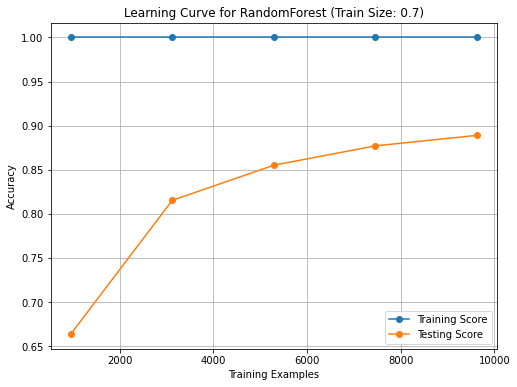

Cross-Validation Scores for RandomForest: [0.57928426 0.80186209 0.70264766 0.65609543 0.4544661 ]
Mean CV Score for RandomForest: 0.6388711085248764





MODEL NAME :  RandomForestClassifier(random_state=42) 




              precision    recall  f1-score   support

           0       0.89      0.96      0.92        74
           1       0.81      0.86      0.83        58
           2       0.94      1.00      0.97        67
           3       0.94      0.88      0.91        57
           4       0.97      0.98      0.98        61
           5       0.88      0.82      0.85        74
           6       1.00      0.97      0.99        36
           7       0.90      0.92      0.91        66
           8       1.00      0.97      0.99        74
           9       0.89      0.90      0.90        73
          10       0.81      0.87      0.84        76
          11       0.89      0.95      0.92        65
          12       0.92      0.95      0.93        59
          13       0.88      

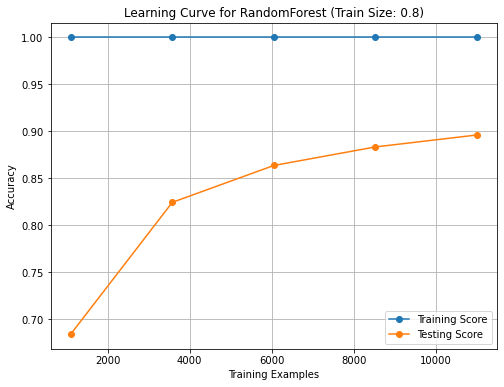

Cross-Validation Scores for RandomForest: [0.57928426 0.80186209 0.70264766 0.65609543 0.4544661 ]
Mean CV Score for RandomForest: 0.6388711085248764


Model: KNeighbors



MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 




              precision    recall  f1-score   support

           0       0.66      0.83      0.73       101
           1       0.48      0.73      0.58        92
           2       0.67      0.79      0.73       107
           3       0.63      0.78      0.70        90
           4       0.67      0.80      0.73        99
           5       0.53      0.57      0.55       110
           6       0.78      0.84      0.81        58
           7       0.55      0.76      0.64       110
           8       0.87      0.88      0.88       120
           9       0.54      0.74      0.62       114
          10       0.33      0.50      0.40       104
          11       0.55      0.77      0.65        92
          12       0.74      0.71      0.73        94
          13   

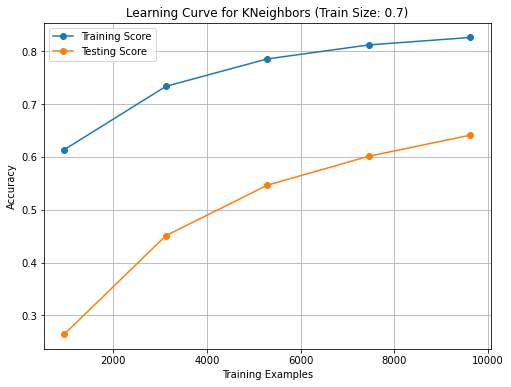

Cross-Validation Scores for KNeighbors: [0.29764329 0.36630783 0.23363398 0.17369799 0.09135874]
Mean CV Score for KNeighbors: 0.23252836776258362





MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 




              precision    recall  f1-score   support

           0       0.70      0.84      0.77        74
           1       0.50      0.78      0.61        58
           2       0.65      0.76      0.70        67
           3       0.61      0.75      0.67        57
           4       0.63      0.74      0.68        61
           5       0.61      0.59      0.60        74
           6       0.76      0.78      0.77        36
           7       0.50      0.76      0.60        66
           8       0.89      0.91      0.90        74
           9       0.56      0.73      0.63        73
          10       0.36      0.50      0.42        76
          11       0.58      0.78      0.67        65
          12       0.71      0.69      0.70        59
          13       0.69      0.62   

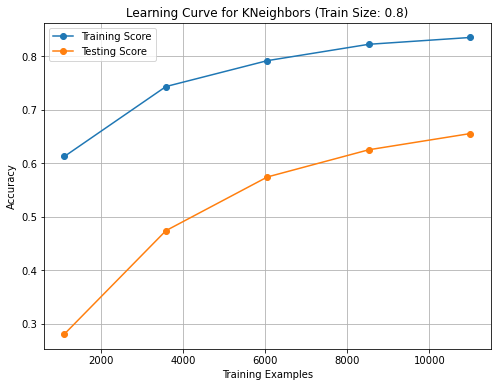

Cross-Validation Scores for KNeighbors: [0.29764329 0.36630783 0.23363398 0.17369799 0.09135874]
Mean CV Score for KNeighbors: 0.23252836776258362




In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, learning_curve, cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_score

X = df.drop(columns = ['region','type','XLarge Bags','Total Volume','Total Bags']) ## Since, type has the least Feature importance

y = df['region']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define a list of models to evaluate
models = [
    ('DecisionTree', DecisionTreeClassifier(criterion='entropy')),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('KNeighbors', KNeighborsClassifier(n_neighbors=3))
]

model_score = []
acc_list = []

for model_name, model in models:
    print(f"Model: {model_name}")
    train_sizes = [0.7, 0.8]
    
    for train_size in train_sizes: 
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
        
        model.fit(X_train,y_train)
    
    
        y_pred = model.predict(X_test)
       
        print("\n\n\nMODEL NAME : ",model,"\n\n\n\n")
    
        print((classification_report(y_test, y_pred)),"\n\n\n")
    
        confusion = confusion_matrix(y_test, y_pred)
        print('\n\nConfusion Matrix:')
        print(confusion)
    
        model_score.append(model.score(X_train,y_train))
        acc_list.append(accuracy_score(y_test,y_pred))
        
        train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate mean training and testing scores across folds
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
    
    # Check for overfitting or underfitting
        if abs(train_scores_mean[-1] - test_scores_mean[-1]) < 0.05:
            status = "Good Fit"
        elif train_scores_mean[-1] > test_scores_mean[-1]:
            status = "Overfitting"
        else:
            status = "Underfitting"
    
    # Print the results
        print(f"Train Size: {train_size}, Train Score: {train_scores_mean[-1]:.2f}, Test Score: {test_scores_mean[-1]:.2f}, Status: {status}")
    
    # Plot learning curves
        plt.figure(figsize=(8, 6))
        plt.title(f'Learning Curve for {model_name} (Train Size: {train_size})')
        plt.xlabel('Training Examples')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
        plt.plot(train_sizes, test_scores_mean, 'o-', label='Testing Score')
        plt.legend(loc='best')
        plt.show()
    
    # Perform cross-validation to get a more robust evaluation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        print(f"Cross-Validation Scores for {model_name}:", cv_scores)
        print(f"Mean CV Score for {model_name}:", np.mean(cv_scores))
        print("\n")    

In [50]:
model_list=['Decision Tree Classifier(0.7)','Decision Tree Classifier(0.8)','Random Forest Classifier(0.7)','Random Forest Classifier(0.8)','KNN Classifier(0.7)','KNN Classifier(0.8)']

score_list = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list})
score_list

,Model,Model_score,Accuracy
0,Decision Tree Classifier(0.7),1.000000,0.778317
1,Decision Tree Classifier(0.8),1.000000,0.780914
2,Random Forest Classifier(0.7),1.000000,0.897013
3,Random Forest Classifier(0.8),1.000000,0.898749
4,KNN Classifier(0.7),0.838640,0.663887
5,KNN Classifier(0.8),0.845868,0.676753


## Even though Random Forest Classifier shows overfitting in the training set data , it has a better learning curve and best accuracy score out of the six models. 
## Therefore, I am selecting Random Forest Classifier with 80 20 % data split With accuracy : 90%. 

# PART 2 : Output is Average Price . 

In [51]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns='AveragePrice')
y =df['AveragePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# Instantiate the Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to your data
model.fit(X_train, y_train)  # X_train contains your feature data, and y_train contains the AveragePrice values

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order and get the corresponding feature names
sorted_feature_importances = sorted(zip(feature_importances, X_train.columns), reverse=True)

# Print or plot feature importances
for importance, feature_name in sorted_feature_importances:
    print(f"Feature: {feature_name}, Importance: {importance}")


Feature: type, Importance: 0.3645229405582515
Feature: Large Bags, Importance: 0.09395966017448044
Feature: Month, Importance: 0.08983323637667474
Feature: 4046, Importance: 0.08704997729068568
Feature: 4225, Importance: 0.07846599720037978
Feature: year, Importance: 0.06828801854327686
Feature: region, Importance: 0.04824767450406763
Feature: 4770, Importance: 0.03594828521436742
Feature: Small Bags, Importance: 0.02346578650985128
Feature: Log_Small_Bags, Importance: 0.023051917231282845
Feature: Log_Total_Bags, Importance: 0.020282945377031715
Feature: Total Bags, Importance: 0.019002474974267318
Feature: Log_Total_Volume, Importance: 0.0187660995529999
Feature: Total Volume, Importance: 0.018373208416399365
Feature: XLarge Bags, Importance: 0.009549139722998699
Feature: GreenAvacado, Importance: 0.001192638352984834


Model: Linear Regression
Mean Squared Error: 0.08
R-squared: 0.51
----------------------------------------


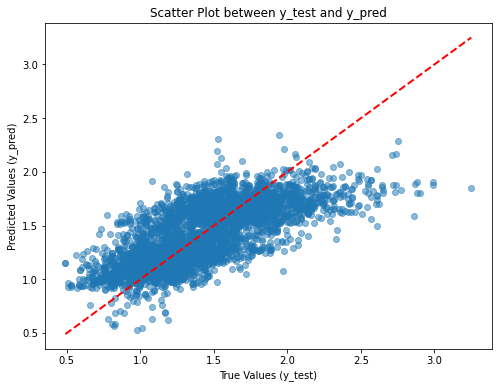

Model: Decision Tree Regressor
Mean Squared Error: 0.04
R-squared: 0.75
----------------------------------------


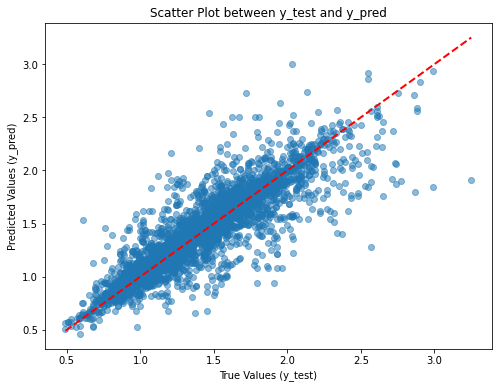

Model: Random Forest Regressor
Mean Squared Error: 0.02
R-squared: 0.88
----------------------------------------


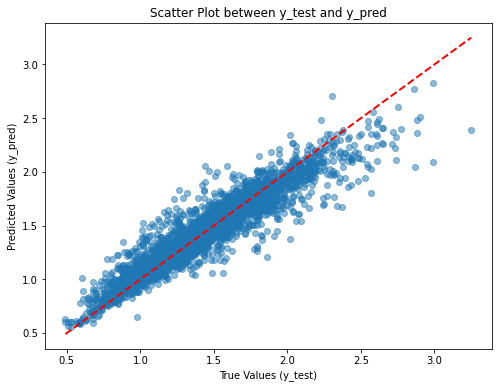

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

X = df.drop(columns=['AveragePrice','XLarge Bags','Total Volume','Total Bags','4770'])

# Step 1: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Step 2: Define a list of regression models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=42)),
    ("Random Forest Regressor", RandomForestRegressor(random_state=42))
]

# Step 3: Loop through the models, train, and evaluate
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Print the results
    
    print(f"Model: {model_name}")
    
    print(f"Mean Squared Error: {mse:.2f}")
    
    print(f"R-squared: {r2:.2f}")
 
    print("-" * 40)
    
    # Initialize a scatter plot
    plt.figure(figsize=(8, 6))

# Scatter plot between y_pred and y_test
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Scatter Plot between y_test and y_pred")
    plt.xlabel("True Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.show()
# Show the plot


## Clearly Random Forest Regressor shows more linear graph between predicted and actual values. 
## Again, random Forest Regressor is the best model giving an 89 % accuracy. 

In [53]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

# Calculate performance metrics for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error (Best Model):", mse_best)
print("R-squared (Best Model):", r2_best)

Best Parameters:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best Score:  0.01990523364816381
Mean Squared Error (Best Model): 0.018926479671403762
R-squared (Best Model): 0.8837526788152504
